# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [35]:
import_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/smoothed_atrophy_seeds'
file_target = '*/*/unthresholded_tissue_segment_z_scores/*grey*no*'
file_column = None

In [36]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=file_column, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/smoothed_atrophy_seeds/*/*/unthresholded_tissue_segment_z_scores/*grey*no*


,sub-0015_grey_matter_generated_nifti_no_nan.nii,sub-0012_grey_matter_generated_nifti_no_nan.nii,sub-0024_grey_matter_generated_nifti_no_nan.nii,sub-0023_grey_matter_generated_nifti_no_nan.nii,sub-0048_grey_matter_generated_nifti_no_nan.nii,sub-0046_grey_matter_generated_nifti_no_nan.nii,sub-0041_grey_matter_generated_nifti_no_nan.nii,sub-0022_grey_matter_generated_nifti_no_nan.nii,sub-0025_grey_matter_generated_nifti_no_nan.nii,sub-0013_grey_matter_generated_nifti_no_nan.nii,...,sub-0010_grey_matter_generated_nifti_no_nan.nii,sub-0032_grey_matter_generated_nifti_no_nan.nii,sub-0035_grey_matter_generated_nifti_no_nan.nii,sub-0003_grey_matter_generated_nifti_no_nan.nii,sub-0004_grey_matter_generated_nifti_no_nan.nii,sub-0050_grey_matter_generated_nifti_no_nan.nii,sub-0005_grey_matter_generated_nifti_no_nan.nii,sub-0002_grey_matter_generated_nifti_no_nan.nii,sub-0034_grey_matter_generated_nifti_no_nan.nii,sub-0033_grey_matter_generated_nifti_no_nan.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [37]:
pre = 'sub-'
post = '_grey'

In [38]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,0015,0012,0024,0023,0048,0046,0041,0022,0025,0013,...,0010,0032,0035,0003,0004,0050,0005,0002,0034,0033
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- Do NOT enter strings for categorical variables. All data must be numerical
- If you need to standardize or otherwise change you data, do it elsewhere first. 

|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [39]:
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/atrophy_roi_scores/master_list_z6_only_unthresholded.csv'
sheet=None

Where do you want to save your data

In [40]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/correlation_to_memory/voxelwise_fwe_uncorrected'

In [41]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,Age,Sex,Cerebellum_CSF_Z6_Wscore,Cortex_CSF_Z6_Wscore,Subcortex_CSF_Z6_Wscore,Temporal_CSF_Z6_Wscore,WholeBrain_CSF_Z6_Wscore,MTL_CSF_Z6_Wscore,Occipital_CSF_Z6_Wscore,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD
0,1,65.230137,0.0,-6009.321545,-60793.620420,-10953.896570,-9388.329841,-83689.489030,-132.372509,-6774.508425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,6.00
1,2,70.578082,0.0,-3850.662188,-17162.125230,-7529.230524,-7070.989533,-32569.746750,-156.523347,1237.404756,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,9.00,13.00
2,3,87.873973,1.0,10248.846600,68496.125620,7456.523690,22529.589540,93807.996580,1240.260811,2942.823325,...,0.0,6.0,NaN,0.0,1.0,0.0,0.0,1.0,24.00,35.00
3,4,79.934247,1.0,15230.510470,90444.876160,12613.641060,26233.552490,122751.791300,775.172267,15641.938950,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,9.67,17.67
4,5,69.791781,0.0,-1743.855548,-27894.129410,-7190.952500,-3360.346304,-37886.648510,-29.168811,-3362.565896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.00,5.00
5,6,76.509589,1.0,-5461.170071,-20532.044570,-8618.929834,-4519.429683,-37569.603170,43.012358,-2599.651920,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.33,4.33
6,7,81.169863,0.0,-7206.470386,-32040.784130,-2008.805976,-5191.544213,-41009.735690,-121.057320,-3813.854085,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.00,7.00
7,8,82.646575,1.0,-2708.968200,31792.721620,31962.585890,34990.748420,69342.040500,8306.897572,-460.565181,...,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,12.00,22.00
8,9,77.347945,1.0,48088.734620,145088.049100,31676.764700,45692.093600,214499.808800,733.115437,22229.538450,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,10.33,14.33
9,10,79.712329,1.0,-265.189488,-15899.361800,-8232.842909,-5113.848678,-27900.841520,-94.331677,-1142.581235,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.00,14.00


Optional - Handle NANs
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [42]:
data_df.columns

Index(['subject', 'Age', 'Sex', 'Cerebellum_CSF_Z6_Wscore',
       'Cortex_CSF_Z6_Wscore', 'Subcortex_CSF_Z6_Wscore',
       'Temporal_CSF_Z6_Wscore', 'WholeBrain_CSF_Z6_Wscore',
       'MTL_CSF_Z6_Wscore', 'Occipital_CSF_Z6_Wscore', 'Frontal_CSF_Z6_Wscore',
       'Parietal_CSF_Z6_Wscore', 'Insula_CSF_Z6_Wscore', 'temp_ins_Z6_Wscore',
       'Cerebellum_GM_Z6_Wscore', 'Cortex_GM_Z6_Wscore',
       'Subcortex_GM_Z6_Wscore', 'Temporal_GM_Z6_Wscore',
       'WholeBrain_GM_Z6_Wscore', 'MTL_GM_Z6_Wscore', 'Occipital_GM_Z6_Wscore',
       'Frontal_GM_Z6_Wscore', 'Parietal_GM_Z6_Wscore', 'Insula_GM_Z6_Wscore',
       'temp_ins_GM_Wscore', 'Cerebellum_WM_Z6_Wscore', 'Cortex_WM_Z6_Wscore',
       'Subcortex_WM_Z6_Wscore', 'Temporal_WM_Z6_Wscore',
       'WholeBrain_WM_Z6_Wscore', 'MTL_WM_Z6_Wscore', 'Occipital_WM_Z6_Wscore',
       'Frontal_WM_Z6_Wscore', 'Parietal_WM_Z6_Wscore', 'Insula_WM_Z6_Wscore',
       'temp_ins_WM_Wscore', 'frontal_eh', 'temporal_eh', 'parietal_eh',
       'occipital_e

In [43]:
drop_list = ['Q4']

In [44]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,subject,Age,Sex,Cerebellum_CSF_Z6_Wscore,Cortex_CSF_Z6_Wscore,Subcortex_CSF_Z6_Wscore,Temporal_CSF_Z6_Wscore,WholeBrain_CSF_Z6_Wscore,MTL_CSF_Z6_Wscore,Occipital_CSF_Z6_Wscore,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD
0,1,65.230137,0.0,-6009.321545,-60793.620420,-10953.896570,-9388.329841,-83689.489030,-132.372509,-6774.508425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,6.00
1,2,70.578082,0.0,-3850.662188,-17162.125230,-7529.230524,-7070.989533,-32569.746750,-156.523347,1237.404756,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,9.00,13.00
3,4,79.934247,1.0,15230.510470,90444.876160,12613.641060,26233.552490,122751.791300,775.172267,15641.938950,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,9.67,17.67
4,5,69.791781,0.0,-1743.855548,-27894.129410,-7190.952500,-3360.346304,-37886.648510,-29.168811,-3362.565896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.00,5.00
5,6,76.509589,1.0,-5461.170071,-20532.044570,-8618.929834,-4519.429683,-37569.603170,43.012358,-2599.651920,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.33,4.33
6,7,81.169863,0.0,-7206.470386,-32040.784130,-2008.805976,-5191.544213,-41009.735690,-121.057320,-3813.854085,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.00,7.00
7,8,82.646575,1.0,-2708.968200,31792.721620,31962.585890,34990.748420,69342.040500,8306.897572,-460.565181,...,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,12.00,22.00
8,9,77.347945,1.0,48088.734620,145088.049100,31676.764700,45692.093600,214499.808800,733.115437,22229.538450,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,10.33,14.33
9,10,79.712329,1.0,-265.189488,-15899.361800,-8232.842909,-5113.848678,-27900.841520,-94.331677,-1142.581235,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.00,14.00
10,11,76.923288,1.0,14491.251670,59121.690610,33784.378950,20115.171910,112641.157700,1599.991784,3693.291933,...,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,18.00,23.00


Optional - Drop Row Based on Value of Column

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [45]:
data_df.columns

Index(['subject', 'Age', 'Sex', 'Cerebellum_CSF_Z6_Wscore',
       'Cortex_CSF_Z6_Wscore', 'Subcortex_CSF_Z6_Wscore',
       'Temporal_CSF_Z6_Wscore', 'WholeBrain_CSF_Z6_Wscore',
       'MTL_CSF_Z6_Wscore', 'Occipital_CSF_Z6_Wscore', 'Frontal_CSF_Z6_Wscore',
       'Parietal_CSF_Z6_Wscore', 'Insula_CSF_Z6_Wscore', 'temp_ins_Z6_Wscore',
       'Cerebellum_GM_Z6_Wscore', 'Cortex_GM_Z6_Wscore',
       'Subcortex_GM_Z6_Wscore', 'Temporal_GM_Z6_Wscore',
       'WholeBrain_GM_Z6_Wscore', 'MTL_GM_Z6_Wscore', 'Occipital_GM_Z6_Wscore',
       'Frontal_GM_Z6_Wscore', 'Parietal_GM_Z6_Wscore', 'Insula_GM_Z6_Wscore',
       'temp_ins_GM_Wscore', 'Cerebellum_WM_Z6_Wscore', 'Cortex_WM_Z6_Wscore',
       'Subcortex_WM_Z6_Wscore', 'Temporal_WM_Z6_Wscore',
       'WholeBrain_WM_Z6_Wscore', 'MTL_WM_Z6_Wscore', 'Occipital_WM_Z6_Wscore',
       'Frontal_WM_Z6_Wscore', 'Parietal_WM_Z6_Wscore', 'Insula_WM_Z6_Wscore',
       'temp_ins_WM_Wscore', 'frontal_eh', 'temporal_eh', 'parietal_eh',
       'occipital_e

In [46]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to drop if T

In [47]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# display(data_df)

Optional - Miscellaneous Manipulations to Data
- Code as needed

In [48]:
# import numpy as np
# data_df = data_df[data_df['StandardDeviation'] != 0]
# data_df['inverse_variance'] = 1/((data_df['StandardDeviation']/100)**2)
# data_df['weighted_outcome'] = data_df['Outcome']*data_df['inverse_variance']
# # # data_df
# # data_df = data_df[data_df['Generalized'] != 0]
# # data_df


Optional - Regress out Covariates

In [49]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model.
# dependent_variable_list = ['Z_Scored_Percent_Cognitive_Improvement']
# regressors = ['Generalized', 'Focal', 'Multifocal', 'Multiple', 'CertaintyWeight']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Choose Rows to Keep

In [50]:
col_to_keep_list = ['Q4', 'subject']

 Should Now look like: 
- The extra rows will be used as covariates
 
|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [51]:
data_df=data_df.loc[:, col_to_keep_list].T
data_df.columns = data_df.loc['subject', :]
data_df = data_df.drop('subject')
data_df.dropna(inplace=True, axis=1)
data_df

subject,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,40.0,41.0,42.0,43.0,45.0,46.0,47.0,48.0,49.0,50.0
Q4,3.0,4.0,7.0,2.0,2.0,2.0,9.0,4.0,7.0,5.0,...,5.0,2.0,7.0,7.0,3.0,8.0,8.0,1.0,1.0,3.0


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [52]:
mask_path = '/Users/cu135/hires_backdrops/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [53]:
method = 'spearman'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [54]:
max_stat_method = 'pseudo_var_smooth'

In [55]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                          variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path, out_dir=out_dir, 
                          method=method, max_stat_method=max_stat_method, vectorize=True)

calvin_fwe.run(n_permutations=1000, debug=False)

Permuting: 100%|██████████| 1000/1000 [05:25<00:00,  3.08it/s]


95th percentile of permuted statistic:  0.5820597249460018
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/correlation_to_memory/voxelwise_fwe_uncorrected
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/correlation_to_memory/voxelwise_fwe_uncorrected
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/correlation_to_memory/voxelwise_fwe_uncorrected


Visualize the FWE Corrected Image


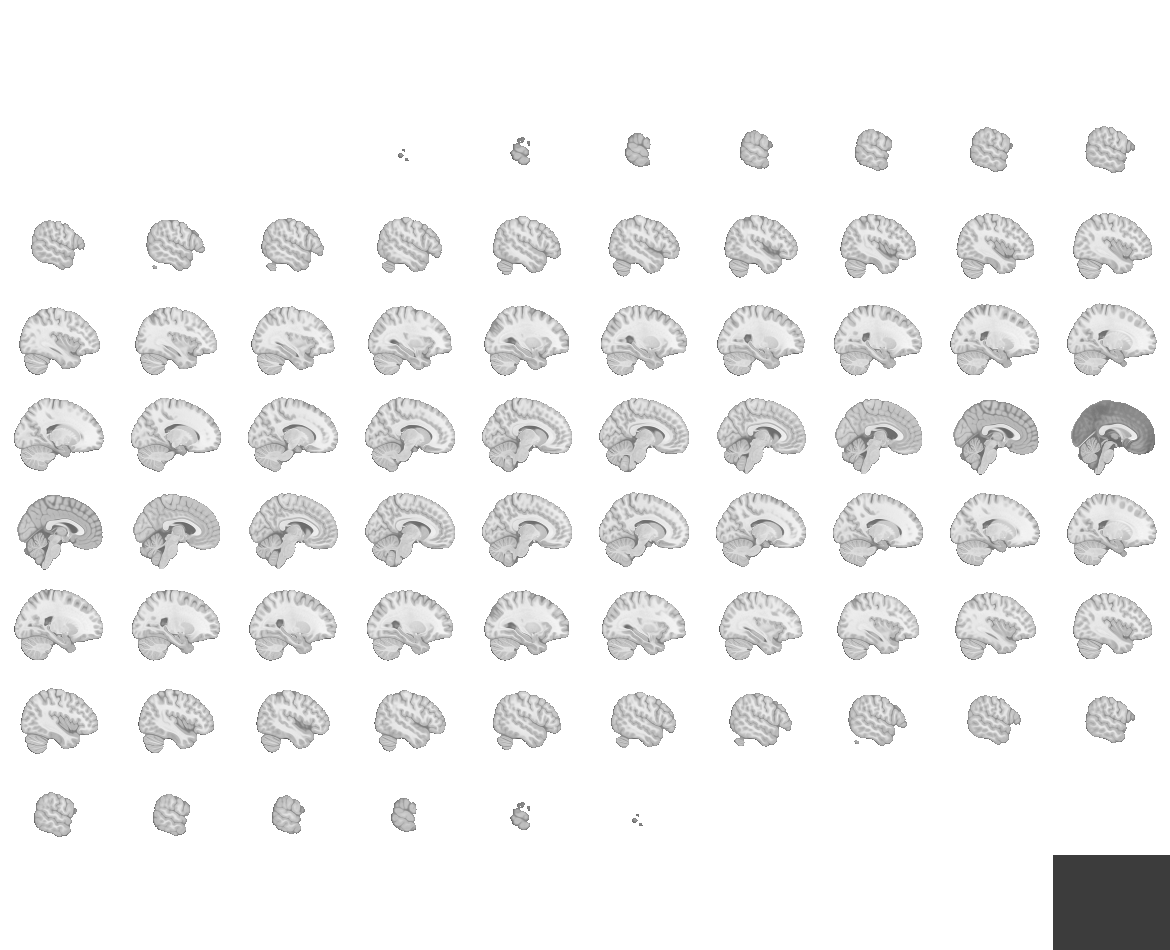
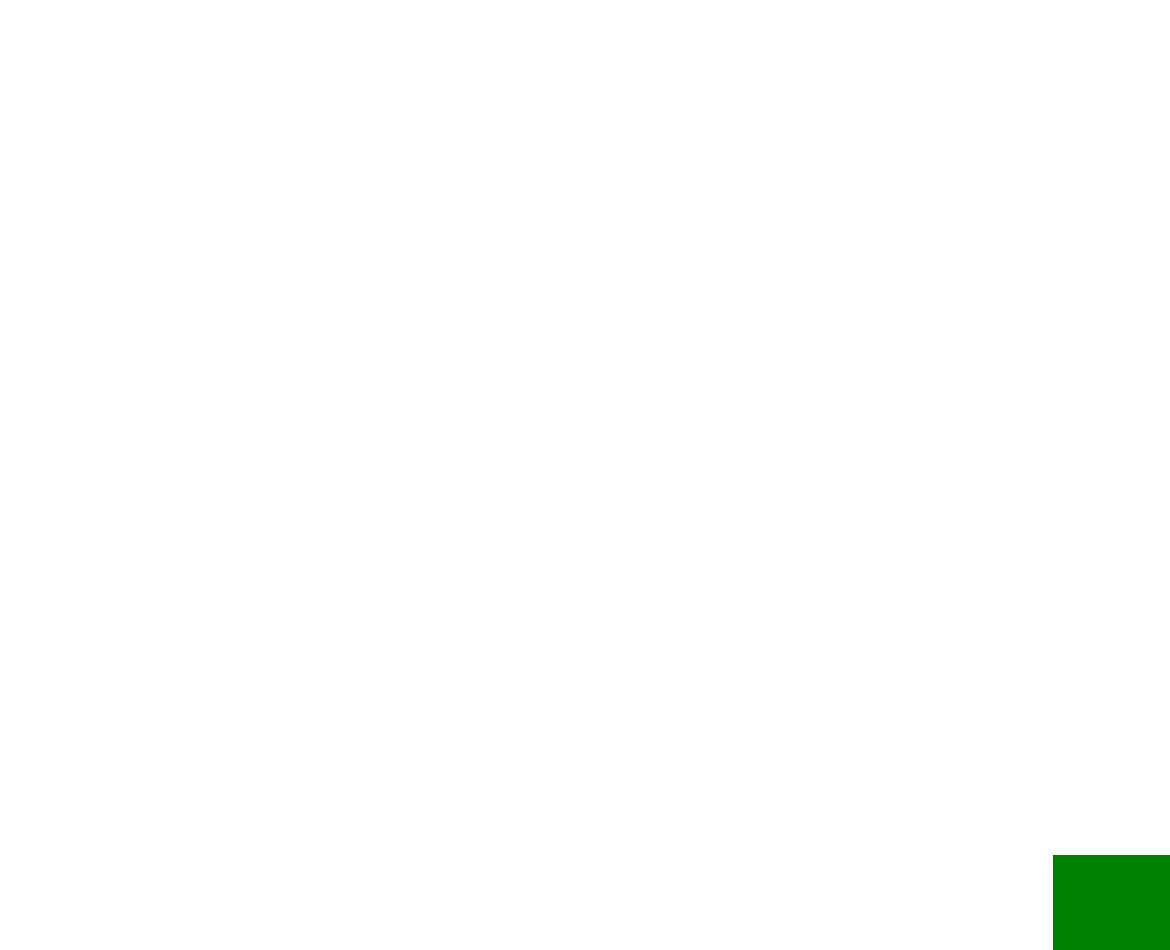

In [56]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


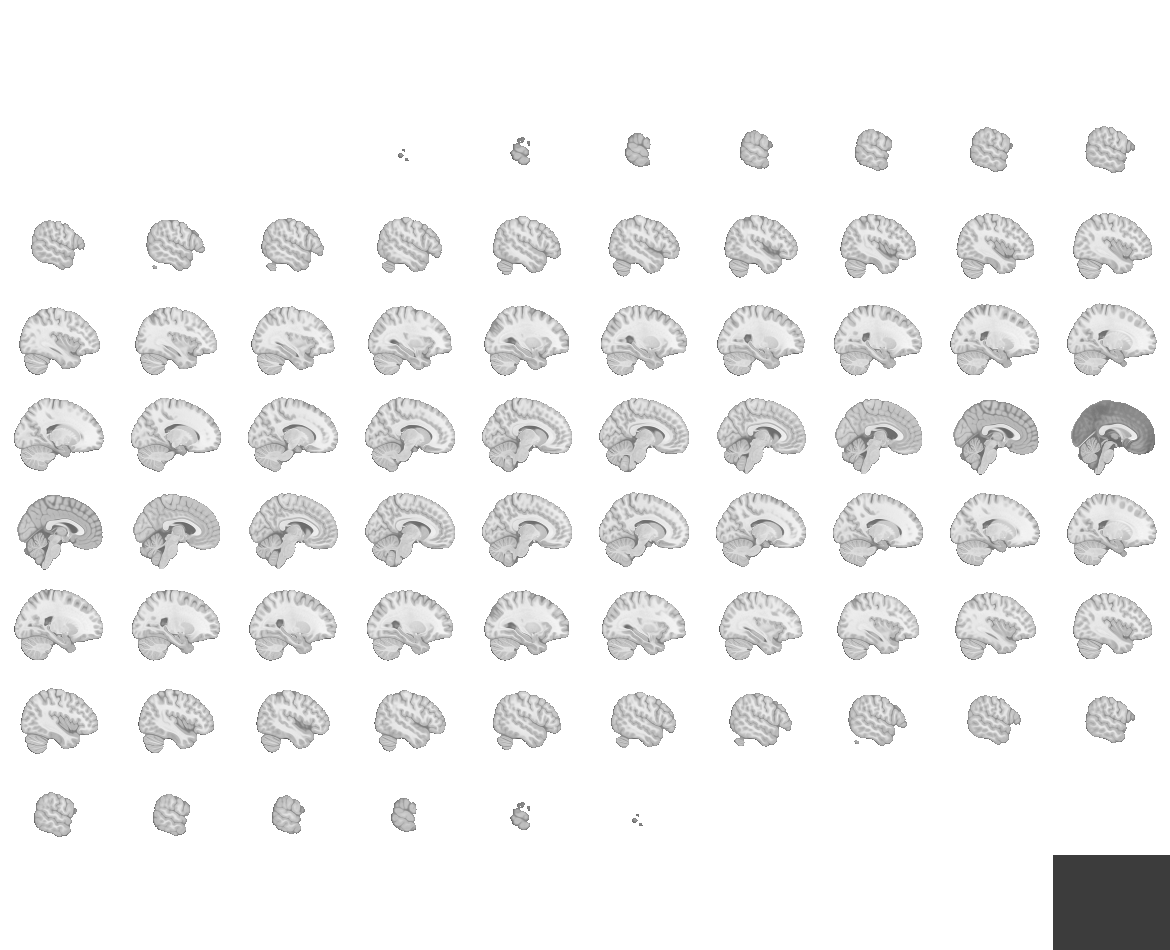
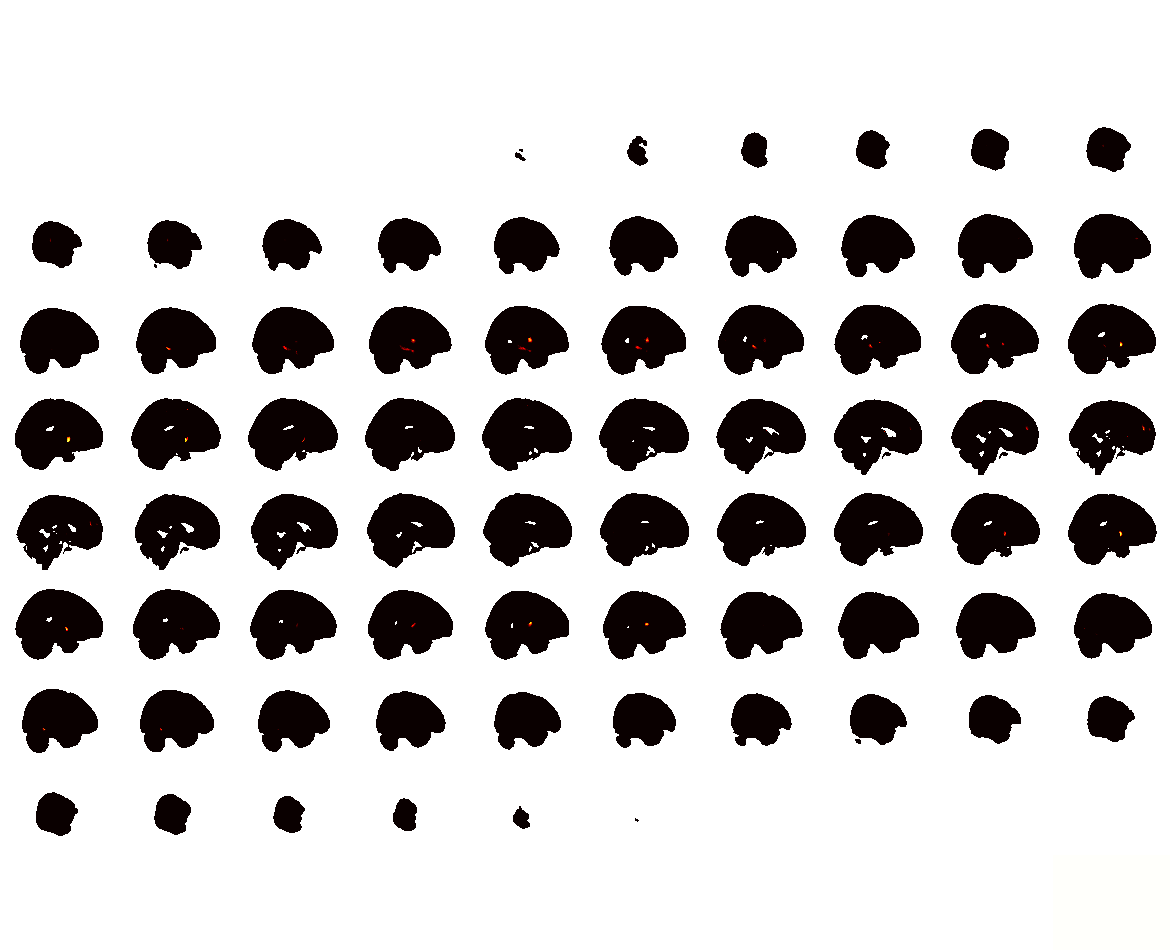

In [57]:
calvin_fwe.p_img

Visualize the Uncorrected Image


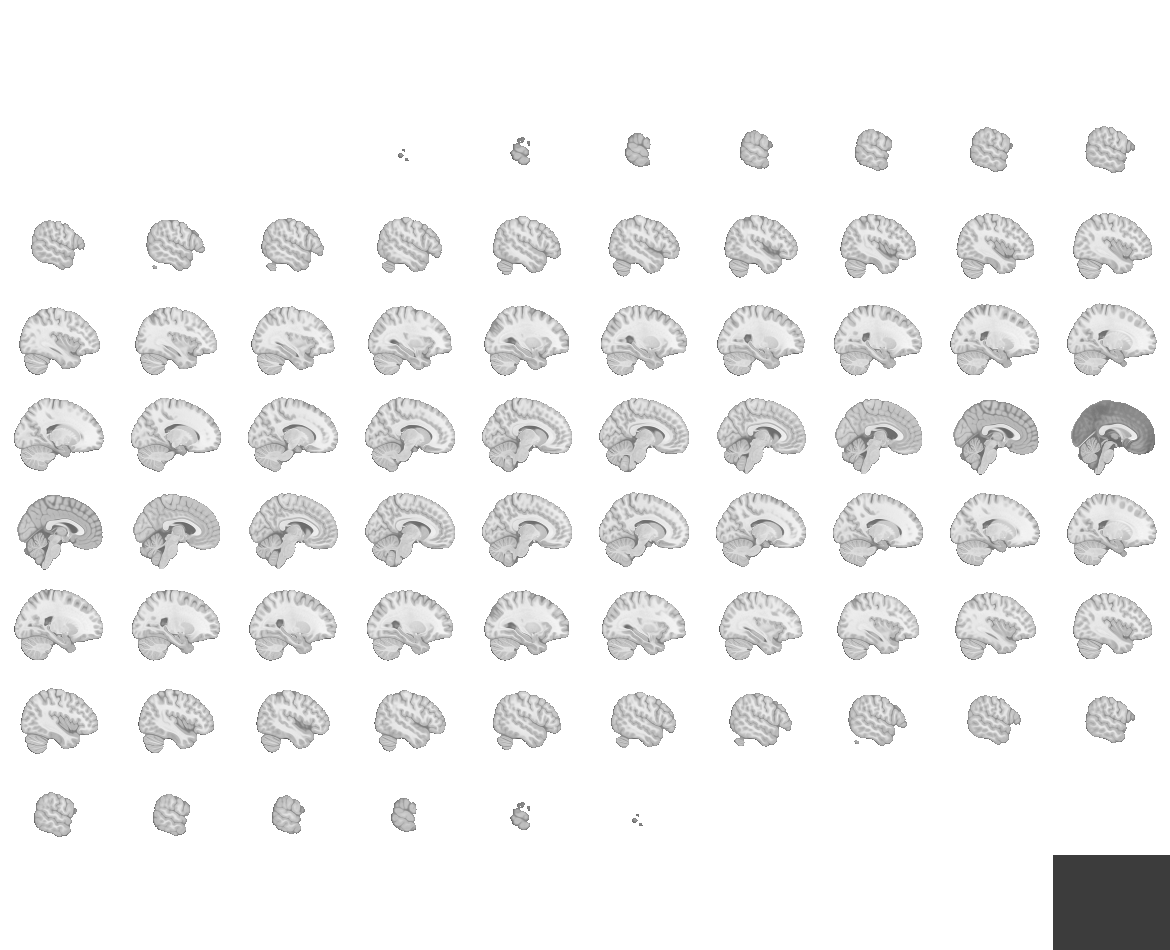
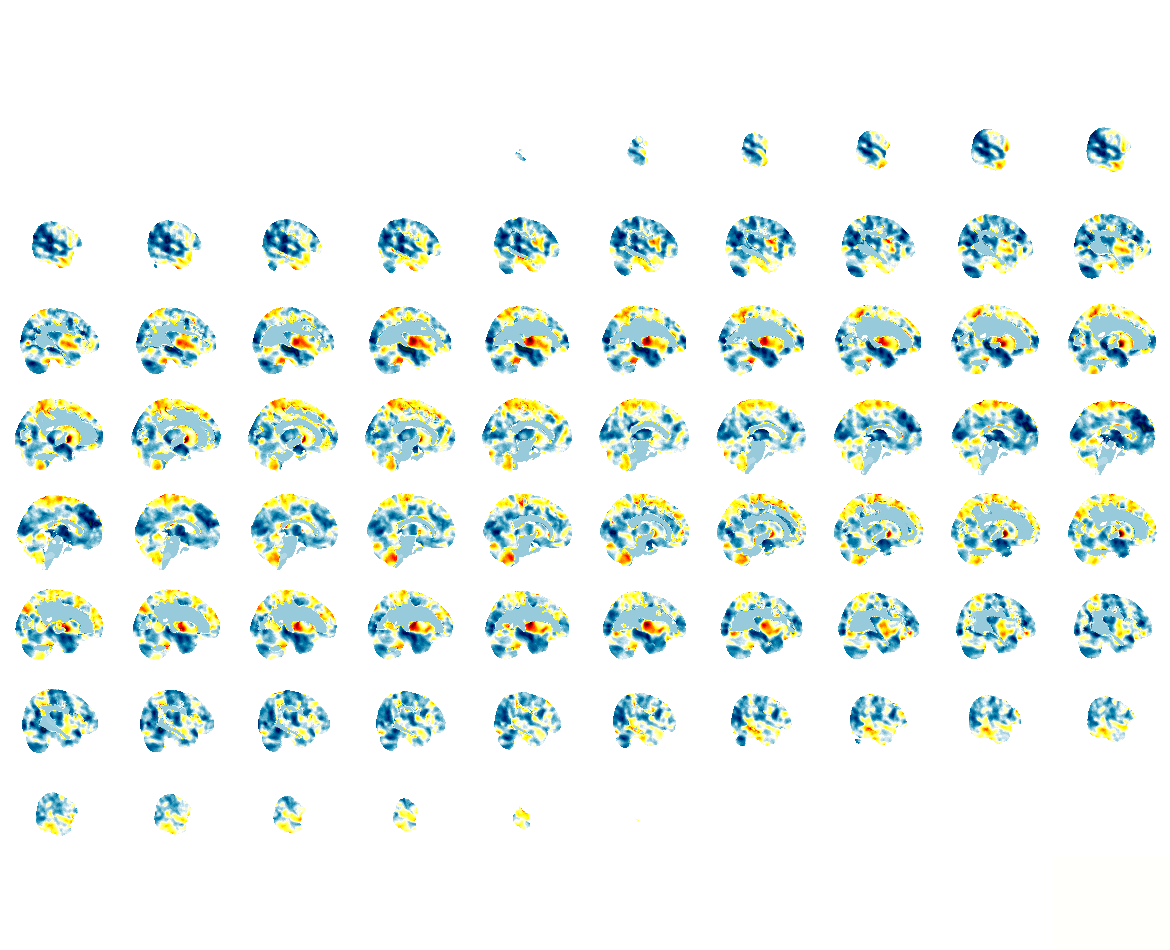

In [58]:
calvin_fwe.uncorrected_img